In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [440]:
data = pd.read_csv("BTC-USD.csv")

In [441]:
df = pd.DataFrame(data)

In [442]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [443]:
df.shape

(3144, 7)

In [444]:
df = df.drop(columns=["High", "Low", "Adj Close", "Volume"])

In [445]:
vola = (df["Close"] - df["Open"])/df["Open"]*100

In [446]:
df["Price Change (in %)"] = vola

In [447]:
df

,Date,Open,Close,Price Change (in %)
0,2014-09-17,465.864014,457.334015,-1.831006
1,2014-09-18,456.859985,424.440002,-7.096262
2,2014-09-19,424.102997,394.795990,-6.910351
3,2014-09-20,394.673004,408.903992,3.605767
4,2014-09-21,408.084991,398.821014,-2.270110
...,...,...,...,...
3139,2023-04-22,27265.894531,27817.500000,2.023060
3140,2023-04-23,27816.144531,27591.384766,-0.808019
3141,2023-04-24,27591.730469,27525.339844,-0.240618
3142,2023-04-25,27514.873047,28307.597656,2.881077


In [448]:
df["Date"] = pd.to_datetime(df["Date"])

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3144 non-null   datetime64[ns]
 1   Open                 3144 non-null   float64       
 2   Close                3144 non-null   float64       
 3   Price Change (in %)  3144 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 98.4 KB


In [450]:
df["Vola"] = df["Price Change (in %)"].rolling(30).std()

In [451]:
df[29:]

,Date,Open,Close,Price Change (in %),Vola
29,2014-10-16,394.518005,382.556000,-3.032056,3.902636
30,2014-10-17,382.756012,383.757996,0.261781,3.898165
31,2014-10-18,383.976013,391.441986,1.944385,3.716510
32,2014-10-19,391.253998,389.545990,-0.436547,3.495210
33,2014-10-20,389.230988,382.845001,-1.640668,3.439858
...,...,...,...,...,...
3139,2023-04-22,27265.894531,27817.500000,2.023060,2.212649
3140,2023-04-23,27816.144531,27591.384766,-0.808019,2.148990
3141,2023-04-24,27591.730469,27525.339844,-0.240618,2.149683
3142,2023-04-25,27514.873047,28307.597656,2.881077,2.188350


In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3144 non-null   datetime64[ns]
 1   Open                 3144 non-null   float64       
 2   Close                3144 non-null   float64       
 3   Price Change (in %)  3144 non-null   float64       
 4   Vola                 3115 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 122.9 KB


In [453]:
df_months = df.resample("MS", on="Date").mean()

In [454]:
df_months

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-09-01,412.654003,407.182428,-1.196854,NaN
2014-10-01,365.748000,364.148873,-0.389605,3.389536
2014-11-01,364.850235,366.099799,0.425109,3.609730
2014-12-01,343.074836,341.267871,-0.490652,2.831754
2015-01-01,251.799905,248.782547,-0.851235,5.395178
...,...,...,...,...
2022-12-01,16969.578818,16949.608808,-0.108070,2.383041
2023-01-01,20043.860131,20250.717490,1.079461,1.794984
2023-02-01,23304.086007,23304.539202,0.034358,2.574482


In [455]:
df_months.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2014-09-01 to 2023-04-01
Freq: MS
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 104 non-null    float64
 1   Close                104 non-null    float64
 2   Price Change (in %)  104 non-null    float64
 3   Vola                 103 non-null    float64
dtypes: float64(4)
memory usage: 4.1 KB


In [456]:
#df_months['Date'] = df_months['Date'].dt.month_name()

Text(0, 0.5, '⌀ der rollenden 30-Tage-Volatilität (pro Monat)')

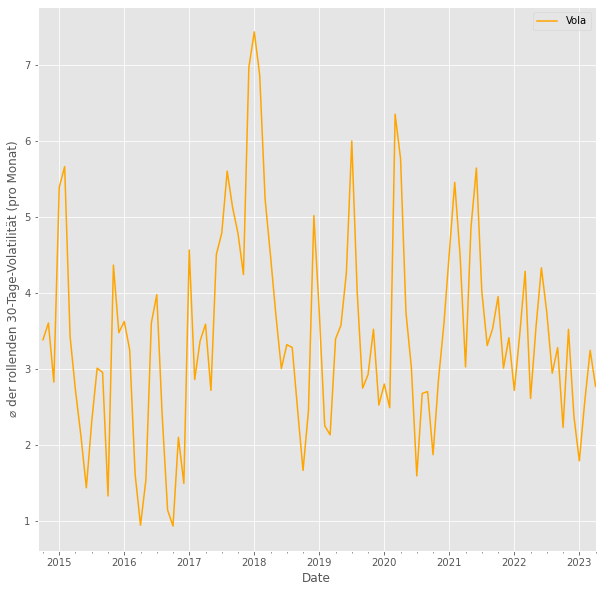

In [457]:
df_months.plot(y = 'Vola', kind = 'line', figsize=(10, 10), color="orange")
plt.ylabel("⌀ der rollenden 30-Tage-Volatilität (pro Monat)")

Text(0, 0.5, 'Rollende 30-Tage-Volatilität pro Tag')

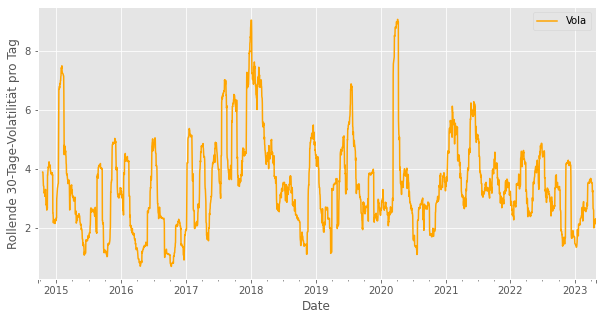

In [458]:
df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="orange")
plt.ylabel("Rollende 30-Tage-Volatilität pro Tag")

In [459]:
df_year = df.resample("Y", on="Date").mean()

In [460]:
df_year

,Open,Close,Price Change (in %),Vola
Date,,,,
2014-12-31,365.058217,363.693085,-0.295195,3.250765
2015-12-31,272.149011,272.453381,0.142118,3.171772
2016-12-31,567.141429,568.492407,0.232391,2.220989
2017-12-31,3970.644848,4006.033629,0.842111,4.445620
2018-12-31,7601.018680,7572.298947,-0.279671,4.070579
2019-12-31,7385.218456,7395.246282,0.249635,3.438487
2020-12-31,11056.787201,11116.378092,0.455531,3.295061
2021-12-31,47402.115663,47436.932021,0.191884,4.100427
2022-12-31,28278.690293,28197.754099,-0.223643,3.254921


Text(0, 0.5, '⌀ der rollenden 30-Tage-Volatilität (pro Jahr)')

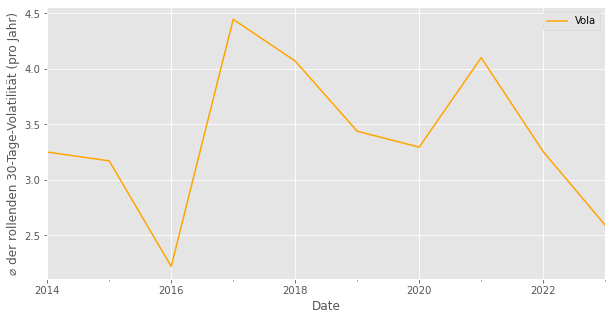

In [461]:
df_year.plot(y = 'Vola', kind = 'line', figsize=(10, 5), color="orange")
plt.ylabel("⌀ der rollenden 30-Tage-Volatilität (pro Jahr)")

In [462]:
usd = pd.read_csv("EUR=X.csv")

In [463]:
usd_df = pd.DataFrame(usd)

In [464]:
usd_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,0.83098,0.83724,0.83056,0.83577,0.83577,0.0
1,2003-12-02,0.83605,0.83710,0.82583,0.82720,0.82720,0.0
2,2003-12-03,0.82713,0.82802,0.82440,0.82488,0.82488,0.0
3,2003-12-04,0.82508,0.83029,0.82345,0.82775,0.82775,0.0
4,2003-12-05,0.82795,0.82878,0.82028,0.82055,0.82055,0.0
...,...,...,...,...,...,...,...
5059,2023-04-21,0.91150,0.91410,0.90971,0.91150,0.91150,0.0
5060,2023-04-24,0.90973,0.91168,0.90627,0.90973,0.90973,0.0
5061,2023-04-25,0.90420,0.91164,0.90350,0.90420,0.90420,0.0
5062,2023-04-26,0.91088,0.91164,0.90138,0.91088,0.91088,0.0


In [465]:
usd_df = usd_df.drop(columns=["High", "Low", "Adj Close", "Volume"])

In [466]:
usd_df

,Date,Open,Close
0,2003-12-01,0.83098,0.83577
1,2003-12-02,0.83605,0.82720
2,2003-12-03,0.82713,0.82488
3,2003-12-04,0.82508,0.82775
4,2003-12-05,0.82795,0.82055
...,...,...,...
5059,2023-04-21,0.91150,0.91150
5060,2023-04-24,0.90973,0.90973
5061,2023-04-25,0.90420,0.90420
5062,2023-04-26,0.91088,0.91088


In [467]:
vola_usd = (usd_df["Close"] - usd_df["Open"])/usd_df["Open"]*100

In [468]:
usd_df["Price Change (in %)"] = vola_usd

In [469]:
usd_df

,Date,Open,Close,Price Change (in %)
0,2003-12-01,0.83098,0.83577,0.576428
1,2003-12-02,0.83605,0.82720,-1.058549
2,2003-12-03,0.82713,0.82488,-0.272025
3,2003-12-04,0.82508,0.82775,0.323605
4,2003-12-05,0.82795,0.82055,-0.893774
...,...,...,...,...
5059,2023-04-21,0.91150,0.91150,0.000000
5060,2023-04-24,0.90973,0.90973,0.000000
5061,2023-04-25,0.90420,0.90420,0.000000
5062,2023-04-26,0.91088,0.91088,0.000000


In [470]:
usd_df["Date"] = pd.to_datetime(usd_df["Date"])

In [471]:
usd_df

,Date,Open,Close,Price Change (in %)
0,2003-12-01,0.83098,0.83577,0.576428
1,2003-12-02,0.83605,0.82720,-1.058549
2,2003-12-03,0.82713,0.82488,-0.272025
3,2003-12-04,0.82508,0.82775,0.323605
4,2003-12-05,0.82795,0.82055,-0.893774
...,...,...,...,...
5059,2023-04-21,0.91150,0.91150,0.000000
5060,2023-04-24,0.90973,0.90973,0.000000
5061,2023-04-25,0.90420,0.90420,0.000000
5062,2023-04-26,0.91088,0.91088,0.000000


In [472]:
usd_df["Vola"] = usd_df["Price Change (in %)"].rolling(30).std()

In [473]:
usd_df[30:60]

,Date,Open,Close,Price Change (in %),Vola
30,2004-01-12,0.77833,0.78487,0.840261,0.477554
31,2004-01-13,0.78468,0.78211,-0.327522,0.451944
32,2004-01-14,0.78198,0.79045,1.083148,0.509460
33,2004-01-15,0.79014,0.79359,0.436631,0.513588
34,2004-01-16,0.79365,0.80658,1.629182,0.590111
35,2004-01-19,0.80730,0.80945,0.266320,0.589477
36,2004-01-20,0.80965,0.79434,-1.890941,0.678022
37,2004-01-21,0.79485,0.78995,-0.616469,0.674904
38,2004-01-22,0.79001,0.78585,-0.526576,0.678167
39,2004-01-23,0.78592,0.79472,1.119707,0.714481


Text(0.5, 0, 'Jahre')

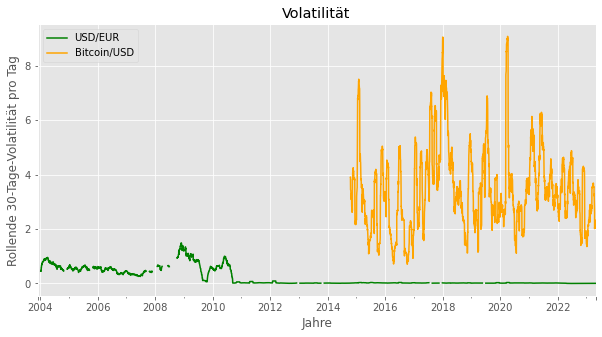

In [474]:
ax = usd_df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="green", title="Volatilität", label="USD/EUR")
df.plot(x = 'Date', y = 'Vola', kind = 'line', figsize=(10, 5), color="orange", label='Bitcoin/USD',ax = ax)
plt.ylabel("Rollende 30-Tage-Volatilität pro Tag")
plt.xlabel("Jahre")

In [475]:
df_merged = pd.merge(df, usd_df, on=['Date'])

In [476]:
df_merged = df_merged.dropna()

In [477]:
df_merged

,Date,Open_x,Close_x,Price Change (in %)_x,Vola_x,Open_y,Close_y,Price Change (in %)_y,Vola_y
21,2014-10-16,394.518005,382.556000,-3.032056,3.902636,0.78000,0.77993,-0.008974,1.480389e-02
22,2014-10-17,382.756012,383.757996,0.261781,3.898165,0.78079,0.78098,0.024334,1.496403e-02
23,2014-10-20,389.230988,382.845001,-1.640668,3.439858,0.78438,0.78434,-0.005100,1.484213e-02
24,2014-10-21,382.420990,386.475006,1.060092,3.423304,0.78154,0.78154,0.000000,1.431390e-02
25,2014-10-22,386.118011,383.157990,-0.766610,3.422079,0.78652,0.78649,-0.003814,1.398670e-02
...,...,...,...,...,...,...,...,...,...
2241,2023-04-20,28823.683594,28245.988281,-2.004238,2.269437,0.91306,0.91306,0.000000,3.273648e-08
2242,2023-04-21,28249.230469,27276.910156,-3.441936,2.290253,0.91150,0.91150,0.000000,3.273648e-08
2243,2023-04-24,27591.730469,27525.339844,-0.240618,2.149683,0.90973,0.90973,0.000000,3.273648e-08
2244,2023-04-25,27514.873047,28307.597656,2.881077,2.188350,0.90420,0.90420,0.000000,3.273648e-08


In [406]:
df_merged = df_merged.drop(columns=['Open_x', 'Close_x', 'Price Change (in %)_x', 'Open_y', 'Close_y', 'Price Change (in %)_y'])

In [407]:
df_merged.set_index('Date')

,Vola_x,Vola_y
Date,,
2014-10-16,3.902636,1.480389e-02
2014-10-17,3.898165,1.496403e-02
2014-10-20,3.439858,1.484213e-02
2014-10-21,3.423304,1.431390e-02
2014-10-22,3.422079,1.398670e-02
...,...,...
2023-04-20,2.269437,3.273648e-08
2023-04-21,2.290253,3.273648e-08
2023-04-24,2.149683,3.273648e-08


Text(0.5, 0, 'USD')

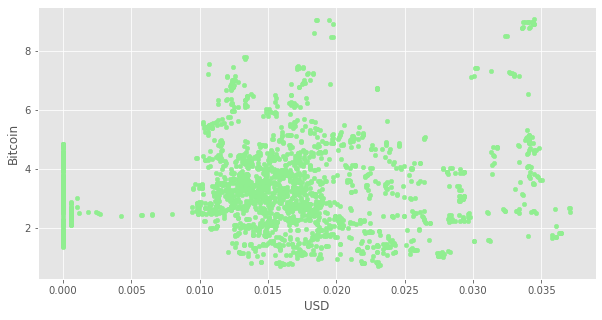

In [408]:
df_merged.plot(x='Vola_y', y='Vola_x', kind='scatter', color='lightgreen', figsize=(10,5))
plt.ylabel('Bitcoin')
plt.xlabel('USD')

In [409]:
df_merged.corr()

,Vola_x,Vola_y
Vola_x,1.000000,0.091852
Vola_y,0.091852,1.000000


Text(0, 0.5, 'Rollende 30-Tage-Volatilität in %')

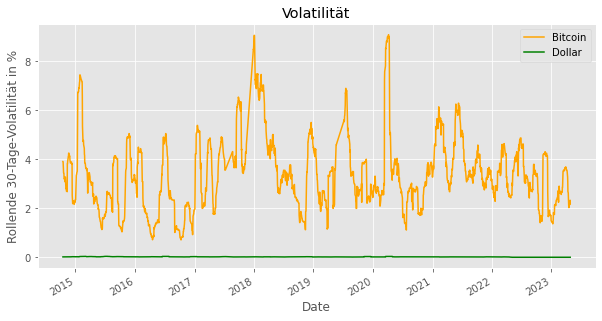

In [410]:
ax = df_merged.plot(x='Date', y='Vola_x', figsize=(10,5), title='Volatilität', label='Bitcoin', color='orange')
#ax.set_yscale('log')
df_merged.plot(x='Date', y='Vola_y', figsize=(10,5), label='Dollar', color='green', ax=ax)
plt.ylabel('Rollende 30-Tage-Volatilität in %')


In [478]:
usd_df_m = usd_df.resample("MS", on="Date").mean()

In [479]:
usd_df_m

,Open,Close,Price Change (in %),Vola
Date,,,,
2003-12-01,0.814242,0.812235,-0.245436,NaN
2004-01-01,0.792812,0.793228,0.056076,6.331482e-01
2004-02-01,0.790923,0.790998,0.012012,8.377601e-01
2004-03-01,0.814356,0.815226,0.112254,8.966440e-01
2004-04-01,0.832825,0.833640,0.102412,8.594172e-01
...,...,...,...,...
2022-12-01,0.944976,0.944976,0.000000,3.273648e-08
2023-01-01,0.928123,0.928122,-0.000148,1.893677e-04
2023-02-01,0.933020,0.933020,0.000000,5.950854e-04


In [480]:
interest = pd.read_csv("FEDFUNDS.csv")

In [481]:
int_df = pd.DataFrame(interest)

In [482]:
int_df.rename(columns={'DATE': 'Date'}, inplace=True)

In [483]:
int_df["Date"] = pd.to_datetime(int_df["Date"])

In [484]:
int_df.set_index('Date')

,FEDFUNDS
Date,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83
...,...
2022-11-01,3.78
2022-12-01,4.10
2023-01-01,4.33


In [485]:
int_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      825 non-null    datetime64[ns]
 1   FEDFUNDS  825 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [486]:
monthly_merge = df_months.merge(usd_df_m,on='Date').merge(int_df,on='Date')

In [487]:
monthly_merge

,Date,Open_x,Close_x,Price Change (in %)_x,Vola_x,Open_y,Close_y,Price Change (in %)_y,Vola_y,FEDFUNDS
0,2014-09-01,412.654003,407.182428,-1.196854,NaN,0.774241,0.774242,0.000132,9.386765e-03,0.09
1,2014-10-01,365.748000,364.148873,-0.389605,3.389536,0.788427,0.788425,-0.000231,1.385269e-02,0.09
2,2014-11-01,364.850235,366.099799,0.425109,3.609730,0.801521,0.801525,0.000503,1.720003e-02,0.09
3,2014-12-01,343.074836,341.267871,-0.490652,2.831754,0.811538,0.811528,-0.001233,1.991220e-02,0.12
4,2015-01-01,251.799905,248.782547,-0.851235,5.395178,0.858029,0.858126,0.010953,2.390748e-02,0.11
...,...,...,...,...,...,...,...,...,...,...
98,2022-11-01,17711.480599,17600.814323,-0.497473,3.526565,0.982231,0.982231,0.000000,3.273648e-08,3.78
99,2022-12-01,16969.578818,16949.608808,-0.108070,2.383041,0.944976,0.944976,0.000000,3.273648e-08,4.10
100,2023-01-01,20043.860131,20250.717490,1.079461,1.794984,0.928123,0.928122,-0.000148,1.893677e-04,4.33
101,2023-02-01,23304.086007,23304.539202,0.034358,2.574482,0.933020,0.933020,0.000000,5.950854e-04,4.57


In [489]:
monthly_merge = monthly_merge.dropna()

In [494]:
monthly_merge = monthly_merge.drop(columns=['Open_x', 'Close_x', 'Price Change (in %)_x', 'Open_y', 'Close_y', 'Price Change (in %)_y'])

In [495]:
monthly_merge.rename(columns={'Vola_x': 'Bitcoin_Vola', 'Vola_y': 'Dollar_Vola', 'FEDFUNDS': 'interest_rate'}, inplace=True)

In [499]:
monthly_merge = monthly_merge.set_index('Date')

In [501]:
monthly_merge.corr()

,Bitcoin_Vola,Dollar_Vola,interest_rate
Bitcoin_Vola,1.000000,0.081556,-0.038919
Dollar_Vola,0.081556,1.000000,-0.600542
interest_rate,-0.038919,-0.600542,1.000000


In [502]:
monthly_merge

,Bitcoin_Vola,Dollar_Vola,interest_rate
Date,,,
2014-10-01,3.389536,1.385269e-02,0.09
2014-11-01,3.609730,1.720003e-02,0.09
2014-12-01,2.831754,1.991220e-02,0.12
2015-01-01,5.395178,2.390748e-02,0.11
2015-02-01,5.669319,3.225495e-02,0.11
...,...,...,...
2022-11-01,3.526565,3.273648e-08,3.78
2022-12-01,2.383041,3.273648e-08,4.10
2023-01-01,1.794984,1.893677e-04,4.33


In [503]:
# FDL model time-series
# dickey fuller test
# beusch godfrey test